CASE STUDY ON UNSUPERVISED LEARNING
The Whole sale customer data is given

Read the dataset to the python environment.
Try out different clustering models in the Whole sale customer dataset. and find the optimum number of clusters in each model and create the model with the optimum number of clusters.
Perform PCA for Dimensionality reduction.

In [ ]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
#read the data
# imprting the dataset
df=pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [ ]:
# Checking for null values
df.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
## consider  cluster based on the sales of items.
df1 = df.iloc[:, 2:].values
data=pd.DataFrame(df1,columns= ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])
data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [ ]:
#different clustering models in the Whole sale customer dataset and find the optimum number of clusters in each model
#create the model with the optimum number of clusters.
# Standardizing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
label_sc =sc.fit_transform(data)
label_sc=pd.DataFrame(label_sc, columns=data.columns)
label_sc

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


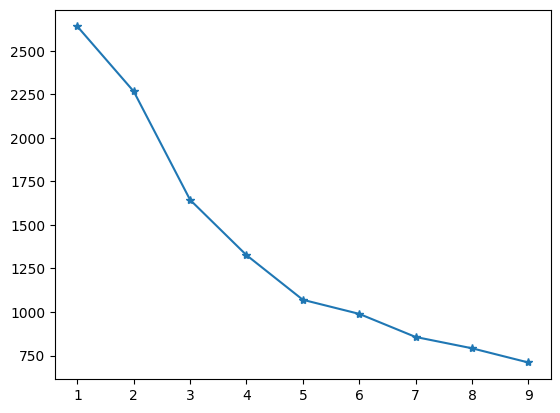

In [ ]:
#useing of k means model
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(label_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,marker='*')
sns.set_style('darkgrid')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(label_sc)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(label_sc,y_kmeans)
print(round(silhouette_avg,5))

0.39983


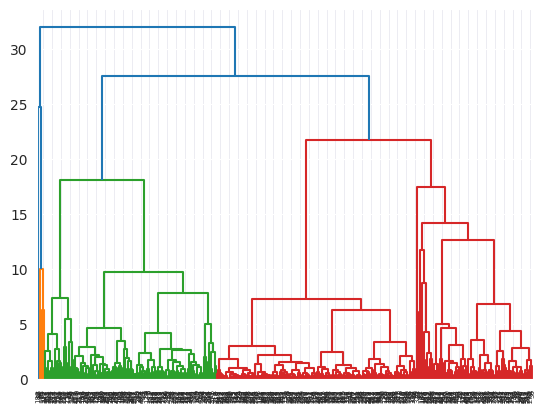

In [ ]:
#Agglomeartive Hierarchial Clustering
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(label_sc,method='ward'),distance_sort='ascending',show_leaf_counts=True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc=hc.fit_predict(label_sc)

In [ ]:
silhouette_avg=silhouette_score(label_sc,y_hc)
print(round(silhouette_avg,5))

0.79246


In [ ]:
#AgglomerativeClustering provides better score

In [ ]:
# Perform PCA for Dimensionality reduction.
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [ ]:
pca.fit(label_sc)
X_pca=pca.transform(label_sc)
X_pca.shape

(440, 2)

In [ ]:
pca.components_

array([[ 0.04288396,  0.54511832,  0.57925635,  0.05118859,  0.5486402 ,
         0.24868198],
       [ 0.52793212,  0.08316765, -0.14608818,  0.61127764, -0.25523316,
         0.50420705]])

In [ ]:
pca.explained_variance_ratio_

array([0.44082893, 0.283764  ])

In [ ]:
pd.DataFrame(pca.components_,columns=label_sc.columns,index=['PC-1','PC-2'])

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC-1,0.042884,0.545118,0.579256,0.051189,0.548640,0.248682
PC-2,0.527932,0.083168,-0.146088,0.611278,-0.255233,0.504207


In [ ]:
x_pca=pd.DataFrame(data=X_pca,columns=['PC-1','PC-2'])
x_pca

,PC-1,PC-2
0,0.193291,-0.305100
1,0.434420,-0.328413
2,0.811143,0.815096
3,-0.778648,0.652754
4,0.166287,1.271434
...,...,...
435,0.870602,2.220845
436,-0.902520,1.676916
437,3.465704,-1.039838
438,-0.918023,-0.030047
